In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
plt.style.use("ggplot")

In [2]:
## read in data
data_2019 = pd.read_csv("DATA/Clean/2019VolumeByWeek.csv", index_col=0)
data_2018 = pd.read_csv("DATA/Clean/2018VolumeByWeek.csv", index_col=0)
media = pd.read_csv("DATA/1. KH_Media_Spend_Tactic_Cleaned.csv")[["Media","Tactic"]].rename(columns = {"Media":"sub_tactics"})

## manipulate data_2019
data_2019["week_start"] = pd.to_datetime(data_2019["week_start"])
data_2019['year'] = "2019"

data_2018["week_start"] = pd.to_datetime(data_2018["week_start"])
data_2018['year'] = "2018"

melt_data_2019 = pd.melt(data_2019,id_vars=['week_start', 'volume_sales', 'volume_sales_merch',
                             'volume_sales_price_reduce', 'volume_sales_feature',
                             'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
                             'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','holiday', 'holiday_binary'],
                             var_name = "sub_tactics",value_name = "media_spending")

melt_data_2018 = pd.melt(data_2018,id_vars=['week_start', 'volume_sales', 'volume_sales_merch',
                             'volume_sales_price_reduce', 'volume_sales_feature',
                             'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
                             'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter','holiday', 'holiday_binary'],
                             var_name = "sub_tactics",value_name = "media_spending")

## manipulate media data
media  = media.drop_duplicates()
media = media.append({"sub_tactics":"VOD","Tactic":"VOD"}, ignore_index=True)



In [3]:
def season(date)->str:
    """categorize date into different season
    """
    if date.month <5:
        return "beginning year"
    elif date.month>=5 and date.month<9:
        return "summer"
    else: 
        return "winter"
    
    
data_2019["season"] = data_2019["week_start"].apply(season)
data_2019.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,NE Heavy Up - Linear TV,NE Heavy Up - OOH,BILLBOARD,DIGITAL,INFLUENCERS/DIGITAL,PRINT,SPONSORSHIP,TV,VOD,season
53,2019-01-07,1.548217e+06,7.402811e+05,145678.038701,42931.319385,649686.102673,0.086570,0.053274,0.041065,0.122087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year
54,2019-01-14,1.623131e+06,8.097526e+05,327474.522514,48009.229937,690111.353199,0.088300,0.052980,0.030905,0.121413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year
55,2019-01-21,1.536969e+06,8.415892e+05,475047.999262,153470.616830,667412.827482,0.088009,0.052805,0.035204,0.119912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year
56,2019-01-28,1.988465e+06,1.256071e+06,957340.258080,374739.879287,925321.610000,0.089716,0.053611,0.041575,0.120350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year
57,2019-02-04,1.634517e+06,8.178591e+05,396446.862630,3665.218335,666161.942857,0.088203,0.056229,0.071665,0.125689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,484375.9724,53499.98,beginning year


In [4]:
master_data = pd.concat([data_2019, pd.get_dummies(data_2019["season"])],axis = 1)
master_data.head()


,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,DIGITAL,INFLUENCERS/DIGITAL,PRINT,SPONSORSHIP,TV,VOD,season,beginning year,summer,winter
53,2019-01-07,1.548217e+06,7.402811e+05,145678.038701,42931.319385,649686.102673,0.086570,0.053274,0.041065,0.122087,...,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year,1,0,0
54,2019-01-14,1.623131e+06,8.097526e+05,327474.522514,48009.229937,690111.353199,0.088300,0.052980,0.030905,0.121413,...,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year,1,0,0
55,2019-01-21,1.536969e+06,8.415892e+05,475047.999262,153470.616830,667412.827482,0.088009,0.052805,0.035204,0.119912,...,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year,1,0,0
56,2019-01-28,1.988465e+06,1.256071e+06,957340.258080,374739.879287,925321.610000,0.089716,0.053611,0.041575,0.120350,...,0.0,0.0,0.0,0.0,0.0000,0.00,beginning year,1,0,0
57,2019-02-04,1.634517e+06,8.178591e+05,396446.862630,3665.218335,666161.942857,0.088203,0.056229,0.071665,0.125689,...,0.0,0.0,0.0,0.0,484375.9724,53499.98,beginning year,1,0,0


In [5]:
master_data_model  = master_data[['volume_sales',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display','BILLBOARD', 'DIGITAL',
       'INFLUENCERS/DIGITAL', 'PRINT', 'SPONSORSHIP', 'TV', 'VOD',
       'beginning year', 'summer', 'winter']]

In [6]:
media.head()

,sub_tactics,Tactic
0,TV - ABC\GMA,TV
1,TV - ABC\GMA3,TV
2,TV - Today Show,TV
3,TV - E!,TV
4,TV - Fox News,TV


In [7]:
melt_data_2018.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,retail_cover,year,month,week,quarter,holiday,holiday_binary,sub_tactics,media_spending
0,2018-01-01,1715897.724,1.141203e+06,7.037752e+05,11874.46896,725089.7700,0.089623,0.057783,0.033019,0.135613,0.495283,2018,1,1,1,Christmas/NY,1,ABC - SCS Sponsorship,0.0
1,2018-01-08,1435106.907,9.135088e+05,3.892043e+05,38589.27999,615666.6837,0.090482,0.057579,0.022327,0.128085,0.494712,2018,1,2,1,None,0,ABC - SCS Sponsorship,0.0
2,2018-01-15,1392563.409,8.978826e+05,4.334663e+05,34808.71644,595837.1872,0.091873,0.057715,0.020024,0.129564,0.497055,2018,1,3,1,None,0,ABC - SCS Sponsorship,0.0
3,2018-01-22,1393401.237,9.541495e+05,6.197307e+05,47374.39127,606422.4579,0.089202,0.057512,0.023474,0.127934,0.498826,2018,1,4,1,None,0,ABC - SCS Sponsorship,0.0
4,2018-01-29,1938644.818,1.418473e+06,1.191214e+06,480359.05080,971064.1176,0.090376,0.057512,0.035211,0.127934,0.496479,2018,1,5,1,None,0,ABC - SCS Sponsorship,0.0


In [8]:
melt_data_2019.head()

,week_start,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,retail_cover,year,month,week,quarter,holiday,holiday_binary,sub_tactics,media_spending
0,2019-01-07,1.548217e+06,7.402811e+05,145678.038701,42931.319385,649686.102673,0.086570,0.053274,0.041065,0.122087,0.600444,2019,1.0,2.0,1.0,None,0.0,ABC - SCS Sponsorship,0.0
1,2019-01-14,1.623131e+06,8.097526e+05,327474.522514,48009.229937,690111.353199,0.088300,0.052980,0.030905,0.121413,0.597130,2019,1.0,3.0,1.0,None,0.0,ABC - SCS Sponsorship,0.0
2,2019-01-21,1.536969e+06,8.415892e+05,475047.999262,153470.616830,667412.827482,0.088009,0.052805,0.035204,0.119912,0.596260,2019,1.0,4.0,1.0,None,0.0,ABC - SCS Sponsorship,0.0
3,2019-01-28,1.988465e+06,1.256071e+06,957340.258080,374739.879287,925321.610000,0.089716,0.053611,0.041575,0.120350,0.598468,2019,1.0,5.0,1.0,None,0.0,ABC - SCS Sponsorship,0.0
4,2019-02-04,1.634517e+06,8.178591e+05,396446.862630,3665.218335,666161.942857,0.088203,0.056229,0.071665,0.125689,0.598677,2019,2.0,6.0,1.0,None,0.0,ABC - SCS Sponsorship,0.0


In [9]:
# join data 2018 2019 to median find out category of tactics
melt_data_2018 = melt_data_2018.merge(media, on = "sub_tactics",how = "left")
melt_data_2019 = melt_data_2019.merge(media, on = "sub_tactics",how = "left")


In [10]:
# aggregrate media spending based on joint data
melt_agg_data = melt_data_2019.groupby(["week_start","Tactic"]).agg({"volume_sales":"mean","volume_sales_merch":"mean",
                                                "volume_sales_price_reduce":"mean","volume_sales_feature":"mean",
                                                "volume_sales_display":"mean","chicken_meal_deal":"mean","sec_deli":"mean",
                                                "sec_center":"mean","retail_cover":"mean","holiday_binary":"mean",
                                                "media_spending":"sum"}).reset_index()

melt_agg_data_2018 = melt_data_2018.groupby(["week_start","Tactic"]).agg({"volume_sales":"mean","volume_sales_merch":"mean",
                                                "volume_sales_price_reduce":"mean","volume_sales_feature":"mean",
                                                "volume_sales_display":"mean","chicken_meal_deal":"mean","sec_deli":"mean",
                                                "sec_center":"mean","retail_cover":"mean","holiday_binary":"mean",
                                                "media_spending":"sum"}).reset_index()




# transform melt_agg_data from long to wide to get median spending by column
media_spending = pd.pivot(data= melt_agg_data, index="week_start", columns="Tactic",values = "media_spending").reset_index()
media_spending_2018 = pd.pivot(data= melt_agg_data_2018, index="week_start", columns="Tactic",values = "media_spending").reset_index()

media_spending["week_start"] = pd.to_datetime(media_spending["week_start"])
media_spending_2018["week_start"] = pd.to_datetime(media_spending_2018["week_start"])


In [13]:
# for the week which has media spending, we shift 2 weeks after and then join back to our 2019 data
media_spending["join_week"] = media_spending['week_start'] +dt.timedelta(days = 14)
media_spending_2018["join_week"] = media_spending_2018['week_start'] +dt.timedelta(days = 14)


In [14]:
# join media spending with 2019 data
master_data = data_2019.rename(columns={"week_start":"join_week"})
master_data_2018 = data_2018.rename(columns={"week_start":"join_week"})

master_data = master_data[['join_week', 'volume_sales', 'volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter',
       'holiday', 'holiday_binary']]

master_data_2018 = master_data_2018[['join_week', 'volume_sales', 'volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter',
       'holiday', 'holiday_binary']]

master_data = master_data.merge(media_spending, on = "join_week", how= "left")
master_data_2018 = master_data_2018.merge(media_spending_2018, on = "join_week", how= "left")


In [15]:
master_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  53 non-null     datetime64[ns]
 1   volume_sales               53 non-null     float64       
 2   volume_sales_merch         53 non-null     float64       
 3   volume_sales_price_reduce  53 non-null     float64       
 4   volume_sales_feature       53 non-null     float64       
 5   volume_sales_display       53 non-null     float64       
 6   chicken_meal_deal          53 non-null     float64       
 7   sec_deli                   53 non-null     float64       
 8   sec_bakery                 53 non-null     float64       
 9   sec_center                 53 non-null     float64       
 10  retail_cover               53 non-null     float64       
 11  year                       53 non-null     object        
 12  month     

In [16]:
# create total median spending
master_data["total_media_spending"] = master_data[['BILLBOARD', 'DIGITAL',
                                                           'INFLUENCERS/DIGITAL', 'PRINT', 'SPONSORSHIP', 'TV', 'VOD']].sum(axis= 1)

master_data_2018["total_media_spending"] = master_data_2018[['BILLBOARD', 'DIGITAL',
                                                           'BASEBALL', 'RADIO', 'SPONSORSHIP', 'TV', 'VOD']].sum(axis= 1)
master_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  53 non-null     datetime64[ns]
 1   volume_sales               53 non-null     float64       
 2   volume_sales_merch         53 non-null     float64       
 3   volume_sales_price_reduce  53 non-null     float64       
 4   volume_sales_feature       53 non-null     float64       
 5   volume_sales_display       53 non-null     float64       
 6   chicken_meal_deal          53 non-null     float64       
 7   sec_deli                   53 non-null     float64       
 8   sec_bakery                 53 non-null     float64       
 9   sec_center                 53 non-null     float64       
 10  retail_cover               53 non-null     float64       
 11  year                       53 non-null     object        
 12  month     

In [17]:
# remove NAs
master_data = master_data.dropna()
master_data_2018 = master_data_2018.dropna()

master_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 51
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  50 non-null     datetime64[ns]
 1   volume_sales               50 non-null     float64       
 2   volume_sales_merch         50 non-null     float64       
 3   volume_sales_price_reduce  50 non-null     float64       
 4   volume_sales_feature       50 non-null     float64       
 5   volume_sales_display       50 non-null     float64       
 6   chicken_meal_deal          50 non-null     float64       
 7   sec_deli                   50 non-null     float64       
 8   sec_bakery                 50 non-null     float64       
 9   sec_center                 50 non-null     float64       
 10  retail_cover               50 non-null     float64       
 11  year                       50 non-null     object        
 12  month     

In [18]:
master_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 2 to 52
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   join_week                  51 non-null     datetime64[ns]
 1   volume_sales               51 non-null     float64       
 2   volume_sales_merch         51 non-null     float64       
 3   volume_sales_price_reduce  51 non-null     float64       
 4   volume_sales_feature       51 non-null     float64       
 5   volume_sales_display       51 non-null     float64       
 6   chicken_meal_deal          51 non-null     float64       
 7   sec_deli                   51 non-null     float64       
 8   sec_bakery                 51 non-null     float64       
 9   sec_center                 51 non-null     float64       
 10  retail_cover               51 non-null     float64       
 11  year                       51 non-null     object        
 12  month     

In [19]:
# transform master data by adding some features and dummay variables
def season(date)->str:
    """categorize date into different season
    """
    if date.month <5:
        return "beginning year"
    elif date.month>=5 and date.month<9:
        return "summer"
    else: 
        return "winter"

master_data["season"] = master_data["week_start"].apply(season)
master_data_2018["season"] = master_data_2018["week_start"].apply(season)


In [20]:
# transform season into dummay variabels
master_data = pd.concat([master_data, pd.get_dummies(master_data["season"])],axis = 1)
master_data_2018 = pd.concat([master_data_2018, pd.get_dummies(master_data_2018["season"])],axis = 1)


In [21]:
# combine 2018 and 2019
master_data_model = pd.concat([master_data,master_data_2018])
master_data_model

,join_week,volume_sales,volume_sales_merch,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,chicken_meal_deal,sec_deli,sec_bakery,sec_center,...,SPONSORSHIP,TV,VOD,total_media_spending,season,beginning year,summer,winter,BASEBALL,RADIO
2,2019-01-21,1.536969e+06,8.415892e+05,4.750480e+05,1.534706e+05,6.674128e+05,0.088009,0.052805,0.035204,0.119912,...,0.0,0.0000,0.00,0.0000,beginning year,1,0,0,NaN,NaN
3,2019-01-28,1.988465e+06,1.256071e+06,9.573403e+05,3.747399e+05,9.253216e+05,0.089716,0.053611,0.041575,0.120350,...,0.0,0.0000,0.00,0.0000,beginning year,1,0,0,NaN,NaN
4,2019-02-04,1.634517e+06,8.178591e+05,3.964469e+05,3.665218e+03,6.661619e+05,0.088203,0.056229,0.071665,0.125689,...,0.0,0.0000,0.00,0.0000,beginning year,1,0,0,NaN,NaN
5,2019-02-11,1.435970e+06,6.457862e+05,1.036986e+05,8.233112e+03,5.967193e+05,0.088300,0.066225,0.090508,0.128035,...,0.0,0.0000,0.00,0.0000,beginning year,1,0,0,NaN,NaN
6,2019-02-18,1.421998e+06,6.429980e+05,1.185356e+05,7.159395e+03,5.892356e+05,0.089305,0.054024,0.049614,0.119074,...,0.0,484375.9724,106999.96,591375.9324,beginning year,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2018-12-03,1.946511e+06,1.341612e+06,8.750864e+05,1.055169e+05,9.290981e+05,0.083333,0.056667,0.050000,0.142222,...,0.0,618194.6705,24000.00,642194.6705,winter,0,0,1,0.0,0.0
49,2018-12-10,2.331136e+06,1.687944e+06,1.339806e+06,4.932998e+05,1.168485e+06,0.083056,0.055371,0.046512,0.137320,...,0.0,192500.0000,0.00,192500.0000,winter,0,0,1,0.0,0.0
50,2018-12-17,4.951592e+06,3.728802e+06,3.020498e+06,1.690660e+06,2.928149e+06,0.082599,0.060573,0.087004,0.142070,...,0.0,347601.2688,96000.00,443601.2688,winter,0,0,1,0.0,0.0
51,2018-12-24,3.725305e+06,2.291838e+06,1.565672e+06,7.467711e+05,1.636610e+06,0.082965,0.060841,0.086283,0.141593,...,0.0,349673.9438,96000.00,445673.9438,winter,0,0,1,0.0,0.0


In [22]:
master_data.columns

Index(['join_week', 'volume_sales', 'volume_sales_merch',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display', 'chicken_meal_deal', 'sec_deli', 'sec_bakery',
       'sec_center', 'retail_cover', 'year', 'month', 'week', 'quarter',
       'holiday', 'holiday_binary', 'week_start', 'BILLBOARD', 'DIGITAL',
       'INFLUENCERS/DIGITAL', 'PRINT', 'SPONSORSHIP', 'TV', 'VOD',
       'total_media_spending', 'season', 'beginning year', 'summer', 'winter'],
      dtype='object')

In [23]:
# select variables for model
master_data_model  = master_data[['volume_sales',
       'volume_sales_price_reduce', 'volume_sales_feature',
       'volume_sales_display','BILLBOARD', 'DIGITAL',
       'INFLUENCERS/DIGITAL', 'PRINT', 'SPONSORSHIP', 'TV', 'VOD',
       'beginning year', 'summer', 'winter']]


# change year to dummy variable
# master_data_model = pd.concat([master_data_model, pd.get_dummies(master_data_model["year"])],axis = 1)

# master_data_model  = master_data_model.drop("year", axis = 1)
master_data_model.head()

,volume_sales,volume_sales_price_reduce,volume_sales_feature,volume_sales_display,BILLBOARD,DIGITAL,INFLUENCERS/DIGITAL,PRINT,SPONSORSHIP,TV,VOD,beginning year,summer,winter
2,1.536969e+06,475047.999262,153470.616830,667412.827482,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,1,0,0
3,1.988465e+06,957340.258080,374739.879287,925321.610000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,1,0,0
4,1.634517e+06,396446.862630,3665.218335,666161.942857,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,1,0,0
5,1.435970e+06,103698.608728,8233.111989,596719.298084,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,1,0,0
6,1.421998e+06,118535.613978,7159.394617,589235.574053,0.0,0.0,0.0,0.0,0.0,484375.9724,106999.96,1,0,0


In [24]:
X = master_data_model.drop("volume_sales", axis = 1)
y = master_data_model[["volume_sales"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 1, test_size = 0.25)


In [25]:
# normalize data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [26]:
# fit regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# coefficient of variables
for index, col in enumerate(X_train.columns):
    print(f"{col}: {round(model.coef_[0][index],2)}")

volume_sales_price_reduce: -0.17
volume_sales_feature: -0.25
volume_sales_display: 1.86
BILLBOARD: 0.8
DIGITAL: -0.25
INFLUENCERS/DIGITAL: 3.26
PRINT: 0.34
SPONSORSHIP: -0.08
TV: 0.06
VOD: -0.69
beginning year: 13869.2
summer: 19693.23
winter: -33562.44


In [28]:
# model score
model.score(X_test, y_test)

0.9232945886735695

In [29]:
# calculate MSE
y_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_predict)
MSE

54825750230.586655

In [30]:
data = pd.DataFrame({"Model Prediction":list(y_predict), "True Value":y_test["volume_sales"]})
data

,Model Prediction,True Value
29,[1506122.7099963096],1.510002e+06
37,[1495408.2287959177],1.522390e+06
42,[1696870.136436732],1.693879e+06
40,[1541389.7629315197],1.586018e+06
4,[1610581.476317601],1.634517e+06
5,[1530856.078826893],1.435970e+06
50,[3961009.1192814885],4.762873e+06
31,[1541039.1746753657],1.638396e+06
48,[2227057.259056319],2.161999e+06
33,[1809601.9586401535],1.988534e+06


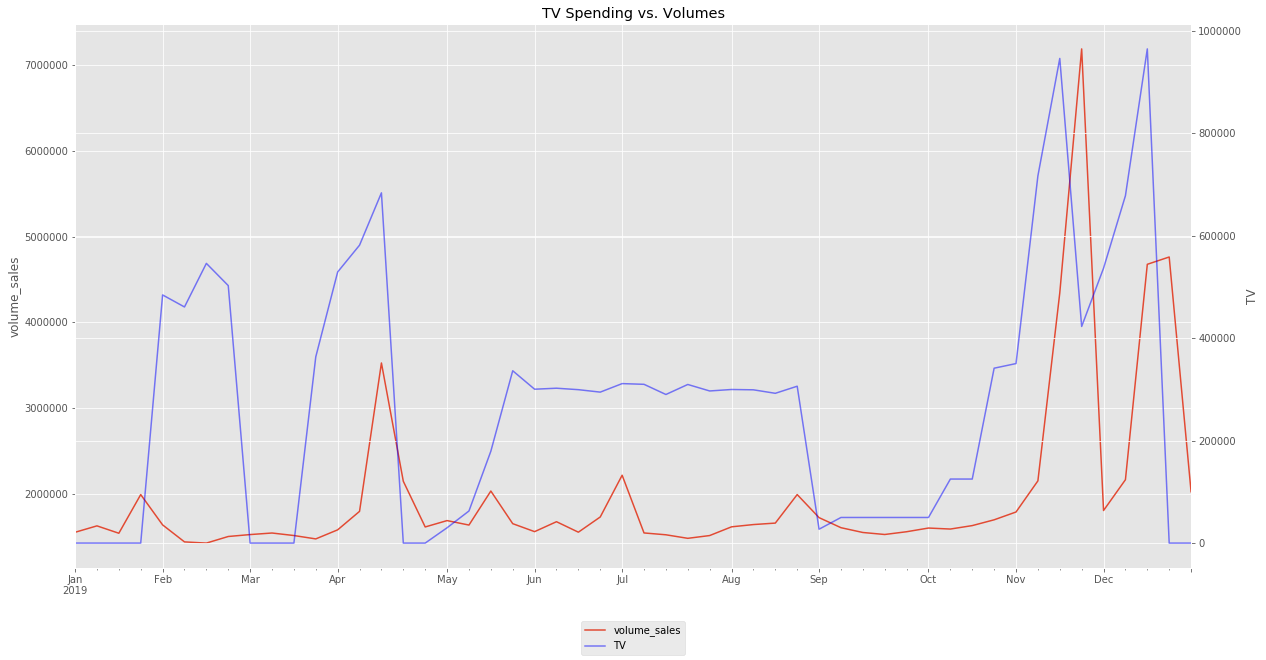

In [31]:
# create plot
ax = data_2019.plot(x="week_start", y="volume_sales", legend=False, figsize = (20,10), title ="TV Spending vs. Volumes")
ax2 = ax.twinx()
data_2019.plot(x="week_start", y="TV", ax=ax2, legend=False, color="blue", alpha = 0.5)
plt.ylabel("TV")
ax.set_ylabel("volume_sales")
ax.set_xlabel("")
ax.figure.legend(loc = "lower center")
plt.show()

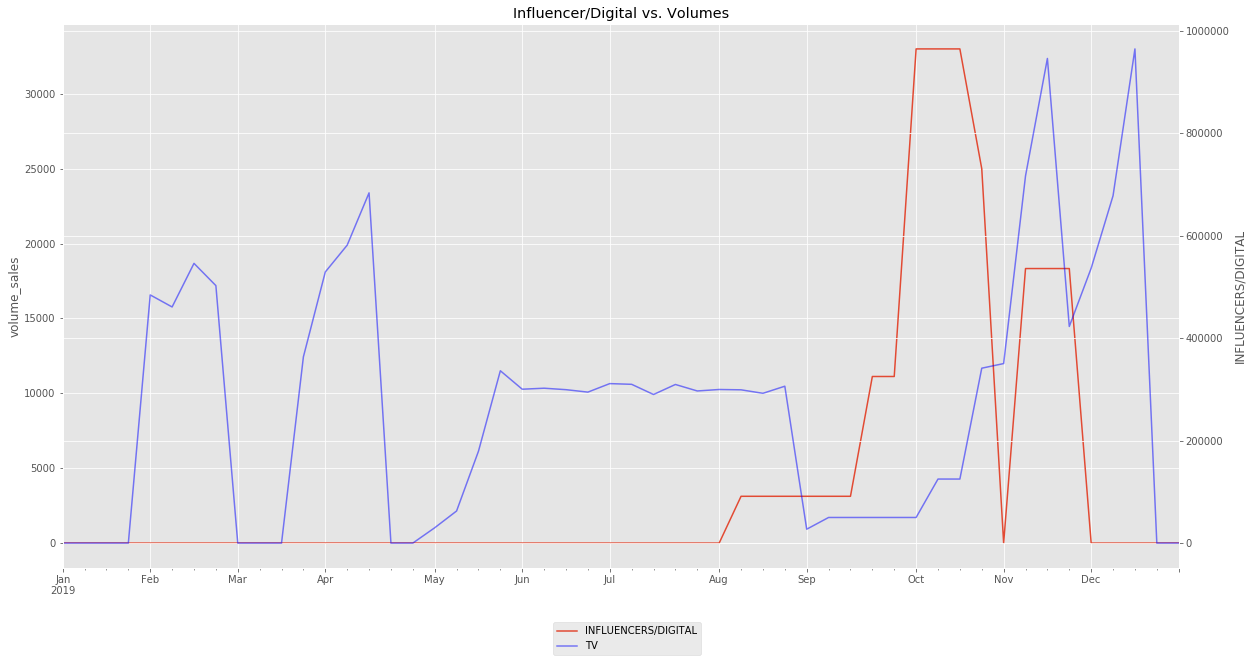

In [32]:
# create plot
ax = data_2019.plot(x="week_start", y="INFLUENCERS/DIGITAL", legend=False, figsize = (20,10), title ="Influencer/Digital vs. Volumes")
ax2 = ax.twinx()
data_2019.plot(x="week_start", y="TV", ax=ax2, legend=False, color="blue", alpha = 0.5)
plt.ylabel("INFLUENCERS/DIGITAL")
ax.set_ylabel("volume_sales")
ax.set_xlabel("")
ax.figure.legend(loc = "lower center")
plt.show()